In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.metrics import r2_score
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [25]:
from google.colab import files 
uploaded = files.upload()

Saving Punjab.csv to Punjab (1).csv


[212] [181.15148114]
[180] [197.67993033]
[187] [194.54831181]
[162] [210.42318913]
[221] [216.39377326]
[204] [195.93174288]
[217] [197.16608256]
[198] [193.0708207]
[179] [187.26155942]
[169] [204.00695771]
[214] [202.5414394]
[264] [205.84620032]
[206] [210.12864489]
[225] [196.54128711]
[276] [205.24888941]
[248] [238.38003637]
[278] [253.20885883]
[255] [252.64730944]
[368] [272.6754139]
[376] [290.983624]
[394] [303.03592035]
[374] [337.22713873]
[365] [361.59082677]
[385] [395.02546498]
[400] [409.44698174]
[644] [415.1334963]
[693] [450.3258931]
[692] [488.80852391]
[505] [540.31508091]
[496] [593.45849819]
[620] [667.91217413]
[991] [692.03195404]
[1024] [727.48496308]
[838] [737.19196688]
[1399] [739.70683317]
[751] [951.75740788]
[1274] [1077.42887154]
[1291] [1139.19968245]
[1339] [1269.44892351]
[1011] [1335.88544614]
[1331] [1144.83271349]
[1870] [1305.80466631]
[1426] [1447.81079751]
[1455] [1401.98883781]
[1735] [1456.01096534]
[1816] [1644.26181724]
[2141] [1750.967044

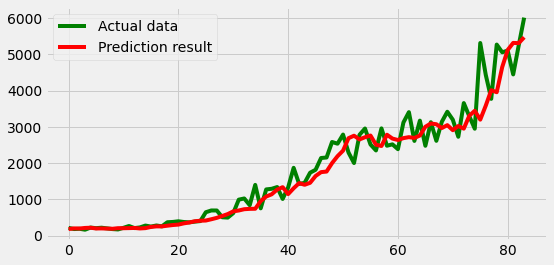

In [26]:
series = pd.read_csv('Punjab (1).csv', parse_dates=['Date'],index_col='Date')
#series.index = series.index.to_period('M')
# split into train and test sets
X = series.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]
#scaler=MinMaxScaler(feature_range=(0,1))
#train=scaler.fit_transform(train)
#test=scaler.fit_transform(test)
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(9,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print(obs,yhat)
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
#test=scaler.inverse_transform(test)
#predictions=scaler.inverse_transform(predictions)
pyplot.figure(figsize=(8,4))
pyplot.plot(test,'g',label='Actual data')
pyplot.plot(predictions,'R',label='Prediction result')
#pyplot.title("Actual result vs prediction CNN-LSTM model result")
pyplot.legend()
pyplot.show()

In [27]:
from sklearn.metrics import r2_score
accuracy=r2_score(test, predictions)
accuracy

0.9276650362483361